In [11]:
import statsmodels.api as sm # this loads statsmodels
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
df = pd.read_csv('weatherHistory.csv')
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [13]:
df = df.drop(['Formatted Date','Summary','Precip Type','Daily Summary','Loud Cover'],axis=1)
#we remove Loud Cover because it's literally all 0s

In [14]:
df.describe() # we can use descripe to get a nice overview of the descriptive statistics of each column in a dataframe

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [15]:
df.isnull().sum()

Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
dtype: int64

In [16]:
#Get the correlation matrix of the dataframe above.
df.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,0.059818
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,1.000000


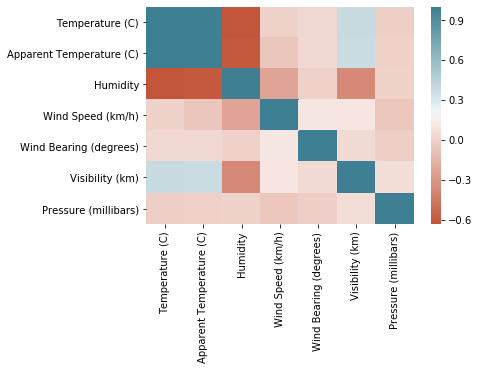

In [18]:
#Import seaborn to improve data visualization.
import seaborn as sb

#Get a plot that visually shows the correalations between every pair of variables.
sb.heatmap(df.corr(), cmap=sb.diverging_palette(20, 220, n=200))

In [19]:
df = df.rename(columns={'Temperature (C)':'temp','Apparent Temperature (C)':'app_temp','Humidity':'hum',
                       'Wind Speed (km/h)':'wind_speed','Wind Bearing (degrees)':'wind_bear','Visibility (km)':'vis',
                       'Pressure (millibars)':'press'})

In [21]:
#Load 'statsmodels.formula.spi' so a constant is automatically added to the data and an intercept in fitted.
import statsmodels.formula.api as smf
#Load 'summary_col' to help us summarize multiple results instances side-by-side.
from statsmodels.iolib.summary2 import summary_col

#We will do a linear regression for each of the X variables, one at a time, then pick the X variable that had the highest R2.
#Next we will do a multiple regression with the X variable from step 1 and each of the other X variables.
#We will add the X variable that increases the R2 by the greatest amount.
#We continue adding X variables until adding another X variable does not significantly increase the R2.
#Doesn't make sense to include apparent temperature in this

m1 = smf.ols('temp ~ hum', data = df).fit()
m2 = smf.ols('temp ~ wind_speed', data = df).fit()
m3 = smf.ols('temp ~ wind_bear', data = df).fit()
m4 = smf.ols('temp ~ vis', data = df).fit()
m5 = smf.ols('temp ~ press', data = df).fit()

summary_col([m1,m2,m3,m4,m5],
            info_dict = {'N': lambda x: "{0:d}".format(int(x.nobs)),
                         'R2': lambda x: "{:.2f}".format(x.rsquared)})

,temp I,temp II,temp III,temp IIII,temp IIIII
Intercept,34.6369,11.7989,11.4325,2.6710,12.3789
,(0.0927),(0.0571),(0.0619),(0.0753),(0.2656)
hum,-30.8944,,,,
,(0.1219),,,,
press,,,,,-0.0004
,,,,,(0.0003)
vis,,,,0.8951,
,,,,(0.0067),
wind_bear,,,0.0027,,
,,,(0.0003),,


In [22]:
#hum had the highest R2.

m1 = smf.ols('temp ~ hum + wind_speed', data = df).fit()
m2 = smf.ols('temp ~ hum + wind_bear', data = df).fit()
m3 = smf.ols('temp ~ hum + vis', data = df).fit()
m4 = smf.ols('temp ~ hum + press', data = df).fit()

summary_col([m1,m2,m3,m4],
            info_dict = {'N': lambda x: "{0:d}".format(int(x.nobs)),
                         'R2': lambda x: "{:.2f}".format(x.rsquared)})

,temp I,temp II,temp III,temp IIII
Intercept,37.8674,34.1298,27.8378,34.8003
,(0.1081),(0.1015),(0.1322),(0.2240)
hum,-32.4374,-30.8955,-27.5645,-30.8939
,(0.1231),(0.1218),(0.1279),(0.1219)
press,,,,-0.0002
,,,,(0.0002)
vis,,,0.4206,
,,,(0.0060),
wind_bear,,0.0027,,
,,(0.0002),,


In [23]:
#hum + vis had the highest R2.

m1 = smf.ols('temp ~ hum + vis + wind_speed', data = df).fit()
m2 = smf.ols('temp ~ hum + vis + wind_bear', data = df).fit()
m3 = smf.ols('temp ~ hum + vis + press', data = df).fit()

summary_col([m1,m2,m3],
            info_dict = {'N': lambda x: "{0:d}".format(int(x.nobs)),
                         'R2': lambda x: "{:.2f}".format(x.rsquared)})

,temp I,temp II,temp III
Intercept,31.0402,27.5211,28.9034
,(0.1409),(0.1368),(0.2337)
hum,-29.0927,-27.5869,-27.5435
,(0.1284),(0.1279),(0.1279)
press,,,-0.0011
,,,(0.0002)
vis,0.4273,0.4179,0.4228
,(0.0059),(0.0060),(0.0060)
wind_bear,,0.0019,
,,(0.0002),


In [24]:
#all these regressions don't matter
#temperature is mostly a function of humidity, visibility and wind speed
#hum + vis + wind_speed had the highest R2.

m1 = smf.ols('temp ~ hum + vis + wind_speed + wind_bear', data = df).fit()
m1 = smf.ols('temp ~ hum + vis + wind_speed + press', data = df).fit()

summary_col([m1,m2],
            info_dict = {'N': lambda x: "{0:d}".format(int(x.nobs)),
                         'R2': lambda x: "{:.2f}".format(x.rsquared)})

,temp I,temp II
Intercept,32.6973,27.5211
,(0.2385),(0.1368)
hum,-29.0719,-27.5869
,(0.1283),(0.1279)
press,-0.0017,
,(0.0002),
vis,0.4307,0.4179
,(0.0059),(0.0060)
wind_bear,,0.0019
,,(0.0002)


In [25]:
#hum + vis + wind_speed + press had the highest R2.

m1 = smf.ols('temp ~ hum + vis + wind_speed + press + wind_bear', data = df).fit()

summary_col([m1],
            info_dict = {'N': lambda x: "{0:d}".format(int(x.nobs)),
                         'R2': lambda x: "{:.2f}".format(x.rsquared)})

,temp
Intercept,32.2203
,(0.2402)
hum,-29.1527
,(0.1283)
vis,0.4262
,(0.0059)
wind_speed,-0.2057
,(0.0034)
press,-0.0017
,(0.0002)


In [26]:
df

,temp,app_temp,hum,wind_speed,wind_bear,vis,press
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
5,9.222222,7.111111,0.85,13.9587,258.0,14.9569,1016.66
6,7.733333,5.522222,0.95,12.3648,259.0,9.9820,1016.72
7,8.772222,6.527778,0.89,14.1519,260.0,9.9820,1016.84
8,10.822222,10.822222,0.82,11.3183,259.0,9.9820,1017.37
9,13.772222,13.772222,0.72,12.5258,279.0,9.9820,1017.22


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(df)

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components= df.shape[1])

pc = pca.fit_transform(X_scaled)

In [29]:
eigen_values = pca.explained_variance_

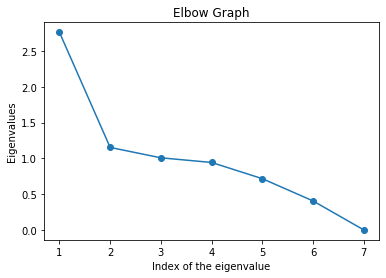

In [31]:
#elbow graph

possibilities = range(1, 8)

plt.plot(possibilities, eigen_values, '-o')
plt.xlabel('Index of the eigenvalue')
plt.ylabel('Eigenvalues')
plt.xticks(possibilities)
plt.title('Elbow Graph')
plt.show()

In [32]:
np.cumsum(pca.explained_variance_ratio_)

array([0.39411782, 0.5590188 , 0.70323555, 0.83819426, 0.94088765,
       0.9992832 , 1.        ])

In [33]:
pca = PCA(n_components=4)

pc = pca.fit_transform(X_scaled)

In [34]:
pca.components_

array([[-0.56905592, -0.56082   ,  0.47980716, -0.06823354, -0.03233655,
        -0.35453657, -0.00661246],
       [-0.13395589, -0.18447152, -0.14553969,  0.77054597,  0.51182399,
         0.11931739, -0.23854297],
       [ 0.07763751,  0.07887168, -0.02913252, -0.06245013, -0.24423256,
        -0.23713941, -0.93119187],
       [-0.10960497, -0.1490662 , -0.20749132,  0.47395328, -0.81634114,
         0.11157171,  0.13863822]])

In [35]:
result = (pca.components_.T * np.sqrt(pca.explained_variance_)).T

In [36]:
df_result = pd.DataFrame(result, columns=df.columns) 
df_result

,temp,app_temp,hum,wind_speed,wind_bear,vis,press
0,-0.945190,-0.931511,0.796950,-0.113335,-0.053710,-0.588878,-0.010983
1,-0.143921,-0.198195,-0.156367,0.827869,0.549900,0.128194,-0.256289
2,0.078006,0.079247,-0.029271,-0.062747,-0.245393,-0.238266,-0.935617
3,-0.106532,-0.144887,-0.201675,0.460667,-0.793457,0.108444,0.134752


In [37]:
df_result.to_csv('pca.csv',index=False)